# Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  

In [392]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import KBinsDiscretizer

In [393]:
sales=pd.read_csv('Company_Data.csv')
sales.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [394]:
sales.shape

(400, 11)

In [395]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [396]:
sales.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [397]:
sales.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [398]:
np.sort(sales['Sales'].unique())

array([ 0.  ,  0.16,  0.37,  0.53,  0.91,  1.42,  1.82,  2.05,  2.07,
        2.23,  2.34,  2.52,  2.66,  2.67,  2.86,  2.93,  2.99,  3.02,
        3.07,  3.13,  3.15,  3.24,  3.42,  3.45,  3.47,  3.58,  3.62,
        3.63,  3.67,  3.72,  3.89,  3.9 ,  3.91,  3.98,  4.1 ,  4.11,
        4.12,  4.15,  4.16,  4.17,  4.19,  4.2 ,  4.21,  4.34,  4.36,
        4.38,  4.42,  4.43,  4.47,  4.53,  4.55,  4.56,  4.62,  4.67,
        4.68,  4.69,  4.74,  4.78,  4.81,  4.83,  4.88,  4.9 ,  4.94,
        4.95,  4.96,  4.97,  4.99,  5.01,  5.04,  5.05,  5.07,  5.08,
        5.12,  5.16,  5.17,  5.21,  5.25,  5.27,  5.28,  5.3 ,  5.31,
        5.32,  5.33,  5.35,  5.36,  5.4 ,  5.42,  5.47,  5.52,  5.53,
        5.55,  5.56,  5.57,  5.58,  5.61,  5.64,  5.68,  5.71,  5.73,
        5.74,  5.81,  5.83,  5.86,  5.87,  5.9 ,  5.93,  5.94,  5.97,
        5.98,  5.99,  6.01,  6.03,  6.1 ,  6.11,  6.14,  6.15,  6.18,
        6.2 ,  6.23,  6.37,  6.38,  6.39,  6.41,  6.42,  6.43,  6.44,
        6.5 ,  6.52,

In [399]:
sales['Sales'].value_counts()

7.80    4
8.77    3
9.32    3
4.10    3
6.20    3
       ..
3.67    1
7.62    1
9.54    1
8.41    1
9.71    1
Name: Sales, Length: 336, dtype: int64

In [400]:
np.sort(sales['CompPrice'].unique())

array([ 77,  85,  86,  88,  89,  93,  94,  95,  96,  97,  98,  99, 100,
       102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114,
       115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127,
       128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140,
       141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
       154, 155, 156, 157, 159, 161, 162, 175], dtype=int64)

In [401]:
np.sort(sales['Income'].unique())

array([ 21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,
        34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,
        47,  48,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,
        61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,
        74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  86,  87,
        88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100,
       101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
       114, 115, 116, 117, 118, 119, 120], dtype=int64)

In [402]:
np.sort(sales['Advertising'].unique())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 29], dtype=int64)

In [403]:
np.sort(sales['Population'].unique())

array([ 10,  12,  13,  14,  16,  17,  18,  19,  22,  24,  25,  26,  27,
        29,  33,  35,  36,  37,  38,  39,  40,  44,  45,  48,  49,  51,
        52,  54,  57,  58,  59,  60,  61,  65,  66,  67,  68,  70,  71,
        74,  76,  79,  80,  81,  85,  86,  87,  89,  90,  93,  94,  95,
        97, 100, 104, 105, 106, 108, 111, 112, 119, 122, 123, 125, 126,
       129, 131, 132, 133, 134, 137, 139, 140, 142, 144, 146, 148, 149,
       150, 151, 152, 156, 158, 160, 161, 164, 168, 170, 171, 173, 176,
       178, 181, 183, 184, 188, 189, 191, 192, 197, 198, 199, 200, 202,
       203, 206, 207, 208, 210, 213, 216, 217, 218, 219, 220, 226, 230,
       232, 236, 237, 238, 239, 241, 243, 244, 245, 249, 251, 256, 260,
       261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 272, 276, 277,
       279, 283, 284, 286, 287, 288, 289, 290, 292, 294, 296, 297, 298,
       300, 303, 304, 306, 310, 312, 315, 316, 317, 319, 322, 324, 325,
       326, 327, 328, 331, 333, 334, 335, 337, 339, 340, 341, 34

In [404]:
np.sort(sales['Price'].unique())

array([ 24,  49,  53,  54,  55,  63,  64,  68,  69,  70,  72,  74,  77,
        78,  79,  80,  81,  82,  83,  84,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 143, 144,
       145, 146, 147, 148, 149, 150, 151, 152, 154, 155, 156, 157, 158,
       159, 160, 162, 163, 164, 166, 171, 173, 185, 191], dtype=int64)

In [405]:
np.sort(sales['Education'].unique())

array([10, 11, 12, 13, 14, 15, 16, 17, 18], dtype=int64)

In [406]:
np.sort(sales['Age'].unique())

array([25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41,
       42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58,
       59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75,
       76, 77, 78, 79, 80], dtype=int64)

In [407]:
sales['ShelveLoc'].value_counts()

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

In [408]:
sales.groupby(['ShelveLoc','Urban','US']).count()

Sales  CompPrice  Income  Advertising  Population  Price  \
ShelveLoc Urban US                                                              
Bad       No    No      11         11      11           11          11     11   
                Yes     11         11      11           11          11     11   
          Yes   No      23         23      23           23          23     23   
                Yes     51         51      51           51          51     51   
Good      No    No       6          6       6            6           6      6   
                Yes     22         22      22           22          22     22   
          Yes   No      18         18      18           18          18     18   
                Yes     39         39      39           39          39     39   
Medium    No    No      29         29      29           29          29     29   
                Yes     39         39      39           39          39     39   
          Yes   No      55         55      55           55          55     55   
                Yes     96         96      96           96          96     96   

                     Age  Education  
ShelveLoc Urban US                   
Bad       No    No    11         11  
                Yes   11         11  
          Yes   No    23         23  
                Yes   51         51  
Good      No    No     6          6  
                Yes   22         22  
          Yes   No    18         18  
                Yes   39         39  
Medium    No    No    29         29  
                Yes   39         39  
          Yes   No    55         55  
                Yes   96         96

In [409]:
sales.groupby(['ShelveLoc']).count()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US
ShelveLoc,,,,,,,,,,
Bad,96,96,96,96,96,96,96,96,96,96
Good,85,85,85,85,85,85,85,85,85,85
Medium,219,219,219,219,219,219,219,219,219,219


In [410]:
sales['Urban'].value_counts()

Yes    282
No     118
Name: Urban, dtype: int64

In [411]:
sales['US'].value_counts()

Yes    258
No     142
Name: US, dtype: int64

In [412]:
#Converting categorical into numerical
sales['ShelveLoc']=np.where(sales['ShelveLoc']=='Good',1,np.where(sales['ShelveLoc']=='Bad',2,3))
sales['Urban'] =np.where(sales['Urban']=='Yes',1,0)
sales['US']=np.where(sales['US']=='Yes',1,0)

In [413]:
sales

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,2,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,3,59,12,1,1
3,7.40,117,100,4,466,97,3,55,14,1,1
4,4.15,141,64,3,340,128,2,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,3,55,11,0,1
397,7.41,162,26,12,368,159,3,40,18,1,1
398,5.94,100,79,7,284,95,2,50,12,1,1


In [414]:
sales['ShelveLoc'].value_counts()

3    219
2     96
1     85
Name: ShelveLoc, dtype: int64

In [415]:
#Converting Sales(Dependent Col into categorical)

sales['Sales'] = pd.cut(sales["Sales"], bins = [-1,5,10,15,20], labels = ['Low','Medium','High','Very High'])

In [416]:
sales

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,Medium,138,73,11,276,120,2,42,17,1,1
1,High,111,48,16,260,83,1,65,10,1,1
2,High,113,35,10,269,80,3,59,12,1,1
3,Medium,117,100,4,466,97,3,55,14,1,1
4,Low,141,64,3,340,128,2,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,High,138,108,17,203,128,1,33,14,1,1
396,Medium,139,23,3,37,120,3,55,11,0,1
397,Medium,162,26,12,368,159,3,40,18,1,1
398,Medium,100,79,7,284,95,2,50,12,1,1


In [417]:
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier

In [418]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(sales.iloc[:,1:],sales.iloc[:,0], test_size=0.2,random_state=40)

In [419]:
x_train

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
85,125,103,0,304,112,3,49,13,0,0
69,127,59,0,339,99,3,65,12,1,0
203,131,82,0,132,157,2,25,14,1,0
379,125,111,0,404,107,2,54,15,1,0
261,121,42,4,188,118,3,54,15,1,1
...,...,...,...,...,...,...,...,...,...,...
306,131,32,1,85,133,3,48,12,1,1
165,147,58,7,100,191,2,27,15,1,1
7,136,81,15,425,120,1,67,10,1,1
219,116,79,19,359,116,1,58,17,1,1


# Building Decision Tree Classifier using Entropy Criteria

In [420]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=5)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [421]:
from sklearn import tree

[Text(0.41847826086956524, 0.9166666666666666, 'X[5] <= 1.5\nentropy = 1.374\nsamples = 320\nvalue = [62, 57, 199, 2]'),
 Text(0.18478260869565216, 0.75, 'X[4] <= 109.5\nentropy = 1.156\nsamples = 67\nvalue = [36, 0, 29, 2]'),
 Text(0.10869565217391304, 0.5833333333333334, 'X[6] <= 55.5\nentropy = 0.994\nsamples = 22\nvalue = [17, 0, 3, 2]'),
 Text(0.06521739130434782, 0.4166666666666667, 'X[0] <= 140.0\nentropy = 0.619\nsamples = 13\nvalue = [11, 0, 0, 2]'),
 Text(0.043478260869565216, 0.25, 'X[7] <= 10.5\nentropy = 0.414\nsamples = 12\nvalue = [11, 0, 0, 1]'),
 Text(0.021739130434782608, 0.08333333333333333, 'entropy = 1.0\nsamples = 2\nvalue = [1, 0, 0, 1]'),
 Text(0.06521739130434782, 0.08333333333333333, 'entropy = 0.0\nsamples = 10\nvalue = [10, 0, 0, 0]'),
 Text(0.08695652173913043, 0.25, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 0, 1]'),
 Text(0.15217391304347827, 0.4166666666666667, 'X[0] <= 122.5\nentropy = 0.918\nsamples = 9\nvalue = [6, 0, 3, 0]'),
 Text(0.130434782608695

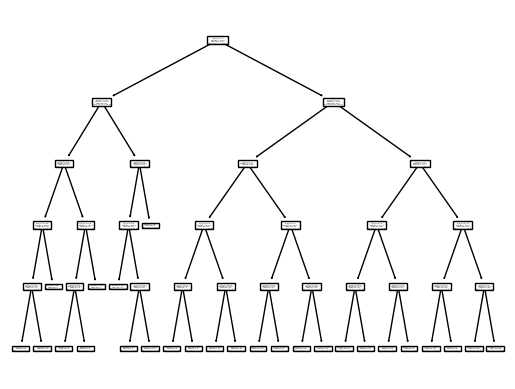

In [422]:
#PLot the decision tree
tree.plot_tree(model)

In [423]:
#Predicting on test data
y_pred = model.predict(x_test) # predicting on test data set 
pd.Series(y_pred).value_counts() # getting the count of each category

Medium    61
High      12
Low        7
dtype: int64

In [424]:
y_pred

array(['High', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'High',
       'Medium', 'Medium', 'High', 'Medium', 'Low', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'High',
       'High', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'High', 'High', 'Medium', 'Medium', 'Low', 'Medium',
       'Medium', 'Medium', 'Low', 'Medium', 'Medium', 'Medium', 'Low',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'High', 'Medium', 'Low',
       'Medium', 'Medium', 'Medium', 'Medium', 'Low', 'Medium', 'Medium',
       'High', 'Medium', 'Low', 'Medium', 'Medium', 'Medium', 'Medium',
       'High', 'High', 'High', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium'], dtype=object)

In [425]:
pd.crosstab(y_test,y_pred) # getting the 2 way table to understand the correct and wrong predictions

col_0,High,Low,Medium
Sales,,,
Low,0,4,16
Medium,6,3,37
High,6,0,8


In [426]:
# Accuracy 
np.mean(y_pred==y_test)

0.5875

# Building Decision Tree Classifier (CART) using Gini Criteria


In [427]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=5)

In [428]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [429]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(pred==y_test)

0.5875

In [430]:
from sklearn.model_selection import GridSearchCV

In [431]:
p_g={'criterion':['gini','entropy'],'max_depth':[2,3,4,5,6,7,8,None]}

gcv=GridSearchCV(model,param_grid=p_g,cv=5)
gcv.fit(x_train,y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=5),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, None]})

In [432]:
print(gcv.best_score_)
print(gcv.best_params_)

0.684375
{'criterion': 'gini', 'max_depth': 5}


# Random Forest Assignment 

In [433]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=20,max_depth=8)
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=8, n_estimators=20)

In [434]:
y_pred1 = rf.predict(x_test)

In [435]:
y_pred1

array(['Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'High',
       'Medium', 'Medium', 'High', 'Medium', 'Medium', 'Medium', 'Medium',
       'High', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'High', 'Medium', 'Medium', 'High', 'Medium',
       'High', 'High', 'High', 'Medium', 'High', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Low', 'Medium', 'Medium', 'Medium',
       'Medium', 'High', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Low', 'Medium', 'High', 'Low',
       'Medium', 'High', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium'], dtype=object)

In [436]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

def metrics(y_test,y_pred):
    cfm= confusion_matrix(y_test,y_pred)
    print(cfm)
    print("Classification report:")

    print(classification_report(y_test,y_pred))

    acc=accuracy_score(y_test,y_pred)
    print("Accuracy of the model: ",acc)

In [437]:
metrics(y_test,y_pred1)

[[ 8  0  6]
 [ 0  3 17]
 [ 4  0 42]]
Classification report:
              precision    recall  f1-score   support

        High       0.67      0.57      0.62        14
         Low       1.00      0.15      0.26        20
      Medium       0.65      0.91      0.76        46

    accuracy                           0.66        80
   macro avg       0.77      0.54      0.54        80
weighted avg       0.74      0.66      0.61        80

Accuracy of the model:  0.6625


In [438]:
# computing the accuracy
np.mean(y_pred1==y_test)

0.6625

In [439]:
p_g={'criterion':['gini','entropy'],'max_depth':[2,3,4,5,6,7,8,None],'n_estimators':[10,20,50,100,200]}

gcv=GridSearchCV(rf,param_grid=p_g,cv=5)
gcv.fit(x_train,y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=8, n_estimators=20),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, None],
                         'n_estimators': [10, 20, 50, 100, 200]})

In [440]:
print(gcv.best_score_)
print(gcv.best_params_)

0.709375
{'criterion': 'entropy', 'max_depth': 8, 'n_estimators': 100}
